In [55]:
import yt
import numpy as np
import matplotlib.pyplot as plt
print(yt.__version__)

4.0.1


In [63]:
ds = yt.load("nonlin_adv2_0000.dat", unit_system="code")

yt : [INFO     ] 2022-05-28 22:56:18,335 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-28 22:56:18,339 Parameters: domain_dimensions         = [60 60  1]
yt : [INFO     ] 2022-05-28 22:56:18,341 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 22:56:18,342 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2022-05-28 22:56:18,343 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2022-05-28 22:56:19,637 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-05-28 22:56:20,284 xlim = 0.000000 5.000000
yt : [INFO     ] 2022-05-28 22:56:20,286 ylim = 0.000000 5.000000
yt : [INFO     ] 2022-05-28 22:56:20,288 xlim = 0.000000 5.000000
yt : [INFO     ] 2022-05-28 22:56:20,289 ylim = 0.000000 5.000000
yt : [INFO     ] 2022-05-28 22:56:20,292 Making a fixed resolution buffer of (('amrvac', 'u')) 800 by 800



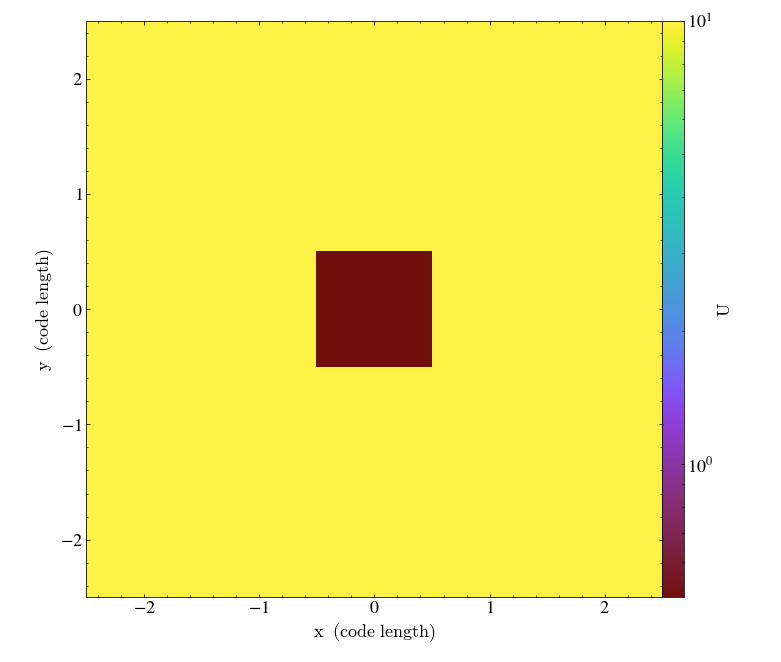

In [64]:
#ds.covering_grid() #Data in matrix uit dat file halen
p=yt.plot_2d(ds,"u")
#p.annotate_cell_edges()
#p.annotate_grids()
p.show()

In [8]:
ds1 = yt.load("nonlin_adv_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv_0001.dat", unit_system="code")

field = ("u")  # The field to average
weight = ("u")  # The weight for the average

ad = ds1.all_data()-ds2.all_data()  # This is a region describing the entire box,
# but note it doesn't read anything in yet!

# We now use our 'quantities' call to get the average quantity
average_value = ad.quantities.weighted_average_quantity(field, weight)

print("Average %s (weighted by %s) is %0.3e %s" % (field, weight, average_value, average_value.units))

#print(
#    "Average %s (weighted by %s) is %0.3e %s"
#    % (field[1], weight[1], average_value, average_value.units)
#)

yt : [INFO     ] 2022-05-28 21:44:48,035 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-28 21:44:48,036 Parameters: domain_dimensions         = [60 32  1]
yt : [INFO     ] 2022-05-28 21:44:48,038 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 21:44:48,041 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2022-05-28 21:44:48,043 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-28 21:44:48,141 Parameters: current_time              = 0.1
yt : [INFO     ] 2022-05-28 21:44:48,143 Parameters: domain_dimensions         = [60 32  1]
yt : [INFO     ] 2022-05-28 21:44:48,144 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 21:44:48,146 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2022-05-28 21:44:48,148 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-28 21:44:48,191 e not found and no parfile passed, can not set thermal_pressure.


YTBooleanObjectsWrongDataset: Boolean data objects must share a common dataset object.

In [65]:
ds1 = yt.load("nonlin_adv2_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv2_0001.dat", unit_system="code")

level = 0
rawdata1 = ds1.covering_grid(level, left_edge=ds1.domain_left_edge, 
                          dims=ds1.domain_dimensions * ds1.refine_by**level)['u']
rawdata2 = ds2.covering_grid(level, left_edge=ds.domain_left_edge, 
                          dims=ds2.domain_dimensions * ds2.refine_by**level)['u']

yt : [INFO     ] 2022-05-28 22:57:38,419 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-28 22:57:38,421 Parameters: domain_dimensions         = [60 60  1]
yt : [INFO     ] 2022-05-28 22:57:38,423 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 22:57:38,425 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2022-05-28 22:57:38,428 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-28 22:57:38,527 Parameters: current_time              = 0.1
yt : [INFO     ] 2022-05-28 22:57:38,528 Parameters: domain_dimensions         = [60 60  1]
yt : [INFO     ] 2022-05-28 22:57:38,530 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-28 22:57:38,532 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2022-05-28 22:57:38,535 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-28 22:57:38,569 e not found and no parfile passed, can not set thermal_pressure.


In [69]:
print(rawdata1[:, :, 0].value)
print(sum(rawdata1[:, :, 0].value))
print(sum(sum(rawdata1[:, :, 0].value)))

[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]]
[600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 486. 486. 486. 486.
 486. 486. 486. 486. 486. 486. 486. 486. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600.]
34632.0


In [75]:
print(sum(sum((rawdata1[:, :, 0].value)**2)))
print(sum(sum(rawdata2[:, :, 0].value)))
print(sum(sum(rawdata1[:, :, 0].value))-sum(sum(rawdata2[:, :, 0].value)))
print(sum(sum((rawdata1[:, :, 0].value-rawdata2[:, :, 0].value)**2)))

345636.0
34625.60319016112
6.3968098388795624
16032.262482308486
